In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error
from statistics import mean

In [2]:
dfTrain = pd.read_csv('content/dataTrain.csv')
dfTest = pd.read_csv('content/dataTest.csv')
#dfTrain = pd.read_csv('dataTrain.csv')
#dfTest = pd.read_csv('dataTest.csv')
print(dfTrain.shape)
print(dfTest.shape)

(2859, 107)
(317, 107)


In [5]:
display(dfTrain.head())
display(dfTest.head())

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,PCIAT-Season_Summer,PCIAT-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,c446e1c5,0.588235,1,0.214286,0.506098,0.573171,0.371534,0.208333,0.582278,0.465347,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1e7dd854,0.352941,1,0.642857,0.347868,0.426829,0.191312,0.291667,0.379747,0.554455,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,c30f5122,0.705882,0,0.642857,0.438162,0.780488,0.474122,0.291667,0.632911,0.534653,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,c9537127,0.294118,0,0.500000,0.435950,0.591463,0.339187,0.416667,0.303797,0.534653,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1ccf44f0,0.235294,1,0.600000,0.776176,0.548780,0.519409,0.500000,0.392405,0.712871,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,PCIAT-Season_Summer,PCIAT-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,6c16a8f1,0.588235,1,0.468750,0.417437,0.371429,0.465498,0.523810,0.392405,0.227848,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,82422684,0.352941,0,0.796875,0.253450,0.814286,0.202489,0.761905,0.215190,0.506329,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,b41cee02,0.294118,1,0.531250,0.690470,0.485714,0.522624,0.095238,0.481013,0.443038,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3709416b,0.352941,0,0.687500,0.256847,0.257143,0.569005,0.476190,0.455696,0.354430,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2c86162c,0.411765,0,0.562500,0.418441,0.542857,0.390271,0.428571,0.670886,0.354430,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [3]:
pciat_cols = dfTrain.columns[dfTrain.columns.str.contains('PCIAT-PCIAT')]
pciat_cols

Index(['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04',
       'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08',
       'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12',
       'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16',
       'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20',
       'PCIAT-PCIAT_Total'],
      dtype='object')

In [4]:
# drop id since we can't directly use that as a feature
dfTrain = dfTrain.drop(columns=['id'])
dfTest = dfTest.drop(columns=['id'])

Xtrain = dfTrain.drop(columns=pciat_cols.union(['sii']))
Xtest = dfTest.drop(columns=pciat_cols.union(['sii']))
ytrain = dfTrain[['sii']]
ytest = dfTest[['sii']]

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2859, 84)
(317, 84)
(2859, 1)
(317, 1)


In [5]:
feature_count = Xtrain.shape[1]
feature_count

84

## Baseline Model (Linear Regression)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [9]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
ytrainpred = model.predict(Xtrain)
ytestpred = model.predict(Xtest)
print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
print("Test MSE ", mean_squared_error(ytest, ytestpred))

model = Lasso(alpha=0.001, random_state=40)
model.fit(Xtrain, ytrain)
ytrainpred = model.predict(Xtrain)
ytestpred = model.predict(Xtest)
print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
print("Test MSE ", mean_squared_error(ytest, ytestpred))

Train MSE  0.4558972828494122
Test MSE  0.4419405499843393
Train MSE  0.4573380898694945
Test MSE  0.43659897378925333


In [10]:
model.coef_[abs(model.coef_) >= 0.025]

array([ 0.29117792, -0.11431561, -0.10756465,  0.2828004 ,  0.19849516,
       -0.10272838, -0.07541879,  0.13302811, -0.03132182,  0.04114178,
        0.04207827, -0.05208451,  0.28563718, -0.09862112, -0.10867625,
        0.15126977,  0.04873258,  0.2673229 ,  0.21205086,  0.09954912,
        0.03386898, -0.03360281, -0.05197335,  0.03220593, -0.03507325,
        0.02572459, -0.06616338, -0.02781248,  0.0254639 , -0.02553602,
        0.05388749,  0.02987617])

<StemContainer object of 3 artists>

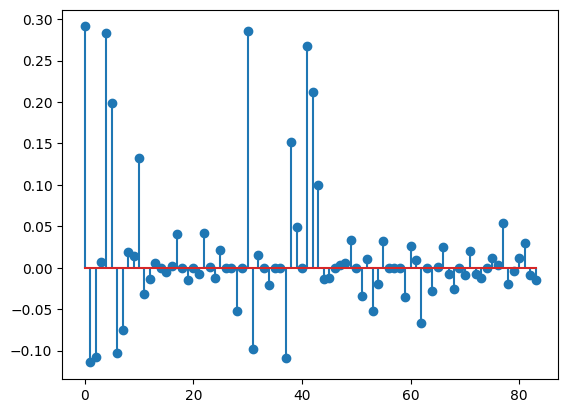

In [11]:
plt.stem(range(len(model.coef_)), model.coef_)

Feature selection graph! You can filter out the features that have low parameter values here.

## Another model (Decision Tree Regressor)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
mod = DecisionTreeRegressor(ccp_alpha=0.003)
mod.fit(Xtrain, ytrain)
ytrainpred = mod.predict(Xtrain)
ytestpred = mod.predict(Xtest)
print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
print("Test MSE ", mean_squared_error(ytest, ytestpred))

Train MSE  0.49796305473766606
Test MSE  0.5494539354144361


## Yet another model (Support Vector Regression)

In [ ]:
from sklearn.svm import SVR
mod = SVR(C=1, kernel='linear')
mod.fit(Xtrain, ytrain['sii'])
ytrainpred = mod.predict(Xtrain)
ytestpred = mod.predict(Xtest)
print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
print("Test MSE ", mean_squared_error(ytest, ytestpred))

Train MSE  0.5003859543652212
Test MSE  0.4597013003356751


## One last model (Random Forest Regressor)

In [12]:
from sklearn.ensemble import RandomForestRegressor
mod = RandomForestRegressor(ccp_alpha=0.003, random_state=40)
mod.fit(Xtrain, ytrain['sii'])
ytrainpred = mod.predict(Xtrain)
ytestpred = mod.predict(Xtest)
print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
print("Test MSE ", mean_squared_error(ytest, ytestpred))

Train MSE  0.3539249959567035
Test MSE  0.4337570258421322


### Hyperparameter tuning on Random Forest Regressor

In [18]:
ccp_alpha_values = []
train_mses = []
test_mses = []

In [19]:
for c in range(-6, 1):
  mod = RandomForestRegressor(ccp_alpha=10**c, random_state=40)
  mod.fit(Xtrain, ytrain['sii'])
  ytrainpred = mod.predict(Xtrain)
  ytestpred = mod.predict(Xtest)
  train_mse =  mean_squared_error(ytrain, ytrainpred)
 # print("ccp_alpha value: ", c/1000)
  test_mse = mean_squared_error(ytest, ytestpred)
  #print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
  #print("Test MSE ", mean_squared_error(ytest, ytestpred))
  ccp_alpha_values.append(10**c)
  train_mses.append(train_mse)
  test_mses.append(test_mse)




In [20]:
dict(zip(ccp_alpha_values, test_mses))

{1e-06: 0.43642933753943225,
 1e-05: 0.43642933753943225,
 0.0001: 0.43642933753943225,
 0.001: 0.4332523731679207,
 0.01: 0.455922099767293,
 0.1: 0.48997817865063925,
 1: 0.48997817865063925}

In [21]:
best_alpha = 0.001
best_test_mse = min(test_mses)

In [22]:
for c in range(2, 10):
    mod = RandomForestRegressor(ccp_alpha=c*0.001, random_state=40)
    mod.fit(Xtrain, ytrain['sii'])
    ytrainpred = mod.predict(Xtrain)
    ytestpred = mod.predict(Xtest)
    train_mse =  mean_squared_error(ytrain, ytrainpred)
    # print("ccp_alpha value: ", c/1000)
    test_mse = mean_squared_error(ytest, ytestpred)
    #print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
    #print("Test MSE ", mean_squared_error(ytest, ytestpred))
    ccp_alpha_values.append(c*0.001)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    if test_mse < best_test_mse:
        best_test_mse = test_mse
        best_alpha = c*0.001

In [23]:
best_alpha

0.002

In [24]:
for c in range(15, 26):
    mod = RandomForestRegressor(ccp_alpha=c*0.0001, random_state=40)
    mod.fit(Xtrain, ytrain['sii'])
    ytrainpred = mod.predict(Xtrain)
    ytestpred = mod.predict(Xtest)
    train_mse =  mean_squared_error(ytrain, ytrainpred)
    # print("ccp_alpha value: ", c/1000)
    test_mse = mean_squared_error(ytest, ytestpred)
    #print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
    #print("Test MSE ", mean_squared_error(ytest, ytestpred))
    ccp_alpha_values.append(c*0.001)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    if test_mse < best_test_mse:
        best_test_mse = test_mse
        best_alpha = c*0.001

In [25]:
best_alpha

0.019

In [26]:
i = np.argmin(test_mses)

print("Best ccp_alpha value: ", ccp_alpha_values[i])
print("Test MSE: ", test_mses[i])
print("Train MSE: ", train_mses[i])

"""
plt.scatter(ccp_alpha_values, train_mses, label='Train MSE')
plt.scatter(ccp_alpha_values, test_mses, label='Test MSE')
plt.legend()
"""
print()

Best ccp_alpha value:  0.019
Test MSE:  0.43011595444396405
Train MSE:  0.25471415645593276



In [27]:
sorted_ccp_alpha, train_mses2, test_mses2 = zip(*sorted(zip(ccp_alpha_values, train_mses, test_mses)))

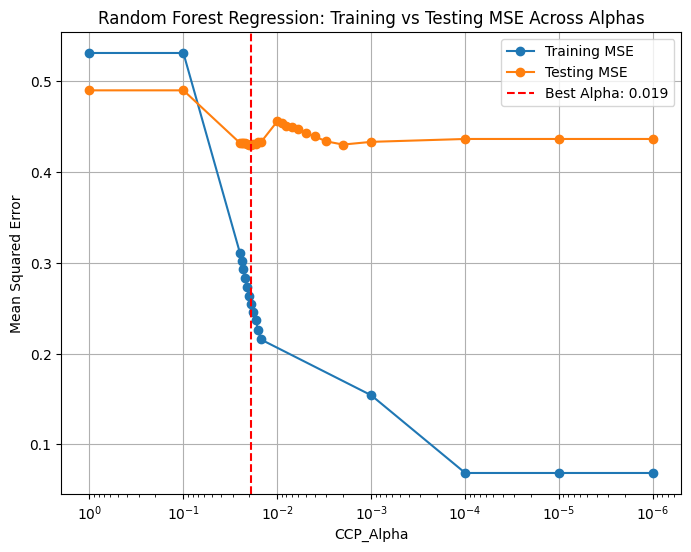

In [43]:
plt.figure(figsize=(8, 6))
sorted_ccp_alpha2 = np.array(sorted_ccp_alpha)
train_mses2 = np.array(train_mses2)
train_mses3 = train_mses2[(sorted_ccp_alpha2 > 0.01) | (sorted_ccp_alpha2 <= 0.001)]
sorted_ccp_alpha2 = sorted_ccp_alpha2[(sorted_ccp_alpha2 > 0.01) | (sorted_ccp_alpha2 <= 0.001)]
plt.plot(sorted_ccp_alpha2, train_mses3, label='Training MSE', marker='o', linestyle='-')
plt.plot(sorted_ccp_alpha, test_mses2, label='Testing MSE', marker='o', linestyle='-')
plt.axvline(x=ccp_alpha_values[i], color='red', linestyle='--', label=f'Best Alpha: {ccp_alpha_values[i]:.3f}')
plt.xlabel('CCP_Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Regression: Training vs Testing MSE Across Alphas')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Logarithmic scale for alpha
plt.gca().invert_xaxis()  # Invert x-axis to show increasing alphas from left to right
plt.show()

### Example predictions

In [45]:
mod = RandomForestRegressor(ccp_alpha=best_alpha, random_state=40)
mod.fit(Xtrain, ytrain['sii'])

RandomForestRegressor(ccp_alpha=0.019, random_state=40)

In [66]:
ytrainpred = mod.predict(Xtrain[10:13])
ytestpred = mod.predict(Xtest[:3])

In [61]:
list(ytrainpred)

[0.4604024249849965, 0.6868929237454906, 0.4545045818194633]

In [60]:
list(ytrain[10:13]['sii'])

[0.0, 1.0, 0.0]

In [67]:
list(ytestpred)

[0.7041894450107118, 0.6995068780417678, 0.3940753939865738]

In [68]:
list(ytest[:3]['sii'])

[0.0, 1.0, 0.0]

## (ANN) Neural Net (tensorflow)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # sequence of layers (output of one layer is input to next)
from tensorflow.keras.layers import Input, Dense # 'dense' layer type that's fully connected to previous layer
from tensorflow.keras.optimizers import Adam # we could use a stochastic gradient descent optimizer as well

In [ ]:
model = Sequential()

In [ ]:
# Input layer
model.add(Input(shape=(feature_count,)))

# Hidden layer
model.add(Dense(64, activation='relu'))  # 64 neurons in the first hidden layer
# ReLU (rectified linear unit) adds nonlinearity and is often used for hidden layers

# Hidden layer
model.add(Dense(32, activation='relu'))  # 32 neurons in the second hidden layer
# 64 and 32 neuron count is adjustable!!

# Output layer (single neuron outputting a value between 0 and 3)
model.add(Dense(1, activation='linear'))  # linear for regression, outputs continuous value

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# specify optimizer (adam or sgd (stochastic gradient descent)), and loss function

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           5,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,553 (29.50 KB)

 Trainable params: 7,553 (29.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(Xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2)

### A note on hyperparameter tuning
You can experiment with the number of layers, neurons, activation functions, and training parameters (epochs, batch size) depending on the problem complexity (want low validation loss)

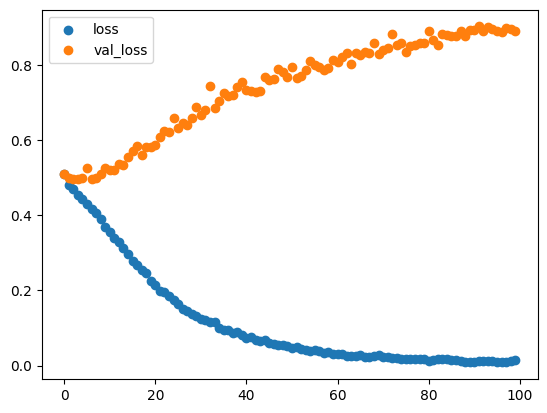

In [ ]:
plt.scatter(range(len(history.history['loss'])), history.history['loss'], label='loss')
plt.scatter(range(len(history.history['loss'])), history.history['val_loss'], label='val_loss')
plt.legend()

Insane overfitting already!

In [ ]:
ytrainpred = model.predict(Xtrain)
ytestpred = model.predict(Xtest)

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
print("Test MSE ", mean_squared_error(ytest, ytestpred))

Train MSE  0.18889020050662367
Test MSE  0.8590225634760416


In [ ]:
min(ytestpred)

array([-1.9334109], dtype=float32)

In [ ]:
def custom_activation(x):
    return 3 * tf.nn.sigmoid(x)  # Sigmoid output scaled to range [0, 3]

In [ ]:
model = Sequential()

model.add(Input(shape=(feature_count,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))

# Define the output layer with the custom activation function
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │           1,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,557 (6.08 KB)

 Trainable params: 1,557 (6.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(Xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
ytrainpred = model.predict(Xtrain)
ytestpred = model.predict(Xtest)
print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
print("Test MSE ", mean_squared_error(ytest, ytestpred))

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train MSE  0.3616185418236544
Test MSE  0.5770438802002713


Now to prevent overfitting...


- Use Regularization (L1, L2) to penalize large weights and encourage simpler models.
- Implement Early Stopping to stop training when validation loss stops improving.
- **Simplify the Model by reducing layers or neurons.**
- Add Dropout layers to reduce overfitting by randomly deactivating neurons.
- Use Cross-Validation to get a more reliable estimate of model performance.
- **Feature Engineering and Scaling can help improve model performance.**
  - Dimensional reduction (PCA) or feature selection; some of the features could be redundant

### More advanced model

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Input(shape=(feature_count,)))
model.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.01))) # lambda of 0.001
#model.add(Dropout(0.5))
model.add(Dense(3, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(Xtrain, ytrain, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_122 (Dense)                    │ (None, 4)                   │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 359 (1.40 KB)

 Trainable params: 359 (1.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7739 - val_loss: 0.6552
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6439 - val_loss: 0.6204
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5871 - val_loss: 0.5946
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5688 - val_loss: 0.5760
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5330 - val_loss: 0.5626
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5590 - val_loss: 0.5502
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5260 - val_loss: 0.5443
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5169 - val_loss: 0.5491
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5282 - val_loss: 0.5293
Epoch 10/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4984 - val_loss: 0.5273
Epoch 11/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4995 - val_loss: 0.5232
Epoch 12/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [ ]:
ytrainpred = model.predict(Xtrain)
ytestpred = model.predict(Xtest)
print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
print("Test MSE ", mean_squared_error(ytest, ytestpred))

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train MSE  0.45675475318602965
Test MSE  0.4385768878456747


In [ ]:
model.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_122 (Dense)                    │ (None, 4)                   │             340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,079 (4.22 KB)

 Trainable params: 359 (1.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 720 (2.82 KB)

### An "ensemble" neural net

This is much harder to configure; I believe it will mostly do worse than a normal prediction.

In [ ]:
pciat_cols.drop('PCIAT-PCIAT_Total')

Index(['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04',
       'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08',
       'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12',
       'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16',
       'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20'],
      dtype='object')

In [ ]:
ytrain2 = dfTrain[pciat_cols.drop('PCIAT-PCIAT_Total')]
ytest2 = dfTest[pciat_cols.drop('PCIAT-PCIAT_Total')]

In [ ]:
def pred_sii(x):
    score_sum = sum(x)

    # Map the sum to a category (0, 1, 2, or 3)
    if score_sum <= 30:
        return 0
    elif score_sum <= 49:
        return 1
    elif score_sum <= 79:
        return 2
    else:
        return 3

In [ ]:
# Build the model for predicting 20 test scores (each between 0 and 5)
model = Sequential()

model.add(Input(shape=(feature_count,)))
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.0001))) # lambda of 0.001
#model.add(Dropout(0.5))
model.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.5))
model.add(Dense(2, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))

# Output layer with 20 units (each representing a test score)
model.add(Dense(20, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(Xtrain, ytrain2, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)                    │ (None, 8)                   │             680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 20)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 786 (3.07 KB)

 Trainable params: 786 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.5763 - val_loss: 2.6255
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2722 - val_loss: 1.9066
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7248 - val_loss: 1.7994
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7203 - val_loss: 1.7857
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6761 - val_loss: 1.7800
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6992 - val_loss: 1.7759
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6899 - val_loss: 1.7771
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6943 - val_loss: 1.7733
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6680 - val_loss: 1.7696
Epoch 10/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6567 - val_loss: 1.7692
Epoch 11/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6603 - val_loss: 1.7688
Epoch 12/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [ ]:
ytrainpred = [pred_sii(x) for x in model.predict(Xtrain)]
ytestpred = [pred_sii(x) for x in model.predict(Xtest)]
print("Train MSE ", mean_squared_error(ytrain, ytrainpred))
print("Test MSE ", mean_squared_error(ytest, ytestpred))

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train MSE  0.6257432668765303
Test MSE  0.5583596214511041
